# Step 1: Simulate Historical Stock Price Data Using Normal Distribution

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate Historical Stock Price Data Using Normal Distribution

# Parameters
mean_daily_return = 0.0005  # average daily return (0.05% daily)
std_dev_daily_return = 0.02  # standard deviation of daily returns (2%)

# Simulate daily returns over 1 year (252 trading days)
num_days = 252
daily_returns = np.random.normal(mean_daily_return, std_dev_daily_return, num_days)
daily_returns


array([-0.00350949, -0.03484021,  0.01771449, -0.03557778,  0.00390404,
        0.01960648,  0.00698518,  0.04606486, -0.03881858, -0.00115721,
        0.00084911, -0.02638206, -0.02257466, -0.01640257, -0.02149295,
       -0.00165989, -0.0115593 ,  0.00685817,  0.01348861,  0.01213558,
       -0.00770252,  0.00618951,  0.02120258,  0.00941129,  0.03767955,
        0.02014358,  0.03486814, -0.04934686,  0.00243352, -0.00597865,
       -0.00199959, -0.01559919,  0.00842399, -0.03566713,  0.00856874,
       -0.01493422, -0.00950772,  0.00927004,  0.00207555,  0.02157842,
       -0.01889007, -0.00111411,  0.01827546,  0.00772399,  0.00901189,
        0.02266086, -0.00762485, -0.01183662,  0.01201809, -0.00248863,
        0.02294407,  0.00789547, -0.01196701,  0.00726768, -0.01755399,
        0.01943857, -0.02744305,  0.02494131,  0.00691753, -0.00279122,
        0.01576668,  0.01072653,  0.02710763,  0.02692123,  0.00754581,
       -0.01693541, -0.01033018, -0.00093294,  0.02213443, -0.00

In [48]:
# Starting stock price
initial_price = 100  # initial stock price in USD

# Calculate the stock price series
stock_prices = [initial_price]
for daily_return in daily_returns:
    new_price = stock_prices[-1] * (1 + daily_return)
    stock_prices.append(new_price)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Day': range(1, num_days+1),
    'Stock Price': stock_prices[1:]
})

df.head()


,Day,Stock Price
0,1,99.864034
1,2,99.422878
2,3,97.139592
3,4,96.984573
4,5,96.470482


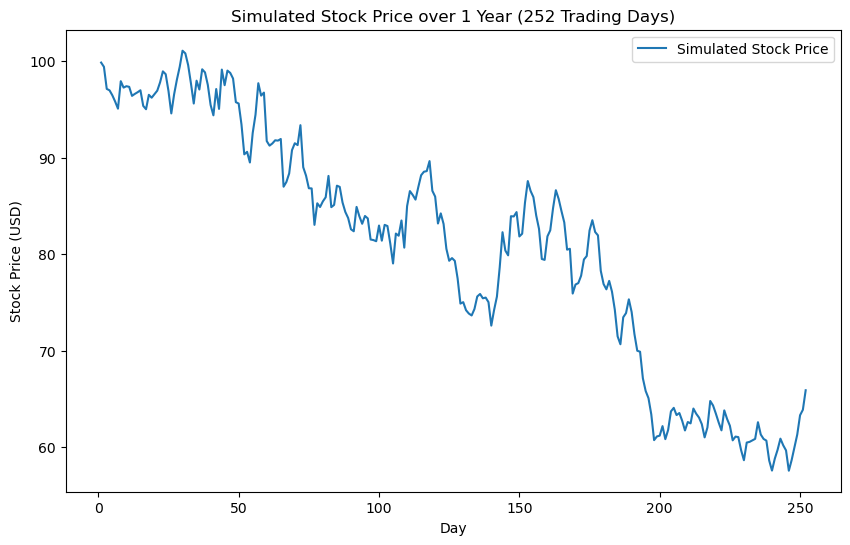

In [50]:
# Plot the simulated stock price
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['Stock Price'], label="Simulated Stock Price")
plt.title("Simulated Stock Price over 1 Year (252 Trading Days)")
plt.xlabel("Day")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Business Interpretation (Historical Stock Simulation):
# The simulated stock price over 1 year indicates the potential volatility.
# A large variance would indicate a higher risk for investors. In our case, 
# the simulated return could be considered a benchmark for stock volatility.
# **Business Action**: The finance team can use this simulation to assess if the stock
# is behaving in a consistent or volatile manner. If volatility is high, 
# they may consider hedging or diversifying their portfolio.


# Step 2: Monte Carlo Simulation to Predict Future Stock Prices (1000 simulations)

In [ ]:


# Number of simulations
num_simulations = 1000

# Simulate 1000 future price paths using the same parameters (mean return, standard deviation)
future_prices = np.zeros((num_simulations, num_days))
for i in range(num_simulations):
    future_returns = np.random.normal(mean_daily_return, std_dev_daily_return, num_days)
    future_price = [initial_price]
    for daily_return in future_returns:
        new_price = future_price[-1] * (1 + daily_return)
        future_price.append(new_price)
    future_prices[i, :] = future_price[1:]

# Plot the Monte Carlo simulation results (1000 paths)
plt.figure(figsize=(10, 6))
plt.plot(future_prices.T, color='blue', alpha=0.1)
plt.title("Monte Carlo Simulation of Future Stock Price (1000 Simulations)")
plt.xlabel("Day")
plt.ylabel("Stock Price (USD)")
plt.show()

# Business Interpretation (Monte Carlo Simulation):
# Monte Carlo simulations give us a sense of where the stock price could go
# in the future, given the assumptions about daily returns.
# **Business Action**: If a significant number of simulated paths suggest large declines,
# the company may take steps to reduce exposure to the stock. This could involve
# diversifying investments or considering protective options like puts or hedging strategies.



# Step 3: Value at Risk (VaR) - 1-day 95% Confidence Interval

In [ ]:

# Calculate the 1-day VaR at 95% confidence level
# VaR at 95% is the 5th percentile of the simulated returns
simulated_returns = (future_prices[:, -1] - initial_price) / initial_price
VaR_95 = np.percentile(simulated_returns, 5)

# Business Interpretation (VaR):
# The Value at Risk (VaR) tells us the worst-case scenario for the stock price
# based on our assumptions, at a 95% confidence level. It indicates that
# there's a 5% chance the stock could lose more than the VaR amount.
# **Business Action**: If VaR is too high, the company should consider
# reducing exposure to this stock, especially if it constitutes a large part
# of the portfolio. Risk mitigation strategies such as setting stop-loss limits
# or diversifying into more stable assets could be considered.

print(f"1-Day 95% Value at Risk (VaR): ${-VaR_95 * initial_price:.2f}")


# Step 4: Statistical Analysis of the Simulated Stock Prices


In [ ]:

# Calculate and print key statistics for the final day stock prices
mean_final_price = np.mean(future_prices[:, -1])
std_dev_final_price = np.std(future_prices[:, -1])
percentile_5th = np.percentile(future_prices[:, -1], 5)
percentile_95th = np.percentile(future_prices[:, -1], 95)

print(f"Mean Final Stock Price: ${mean_final_price:.2f}")
print(f"Standard Deviation of Final Stock Price: ${std_dev_final_price:.2f}")
print(f"5th Percentile (Risk Scenario) Final Stock Price: ${percentile_5th:.2f}")
print(f"95th Percentile (Optimistic Scenario) Final Stock Price: ${percentile_95th:.2f}")



# Business Interpretation (Statistical Analysis):
 - **Mean Final Stock Price**: The expected final price of the stock, assuming
   the current conditions hold.
 - **Standard Deviation of Final Stock Price**: A higher standard deviation
   indicates higher risk. A low standard deviation suggests that the stock
   price will likely stay within a narrower range.
 - **5th Percentile**: Represents a worst-case scenario, indicating the stock price
   at the 5% worst-case percentile.
 - **95th Percentile**: Represents an optimistic scenario, indicating where the
   stock price could be at the 95% best-case percentile.

# **Business Action**: 
 - If the **mean stock price** is significantly lower than the current price, 
   the company might consider reducing exposure.
 - If the **5th percentile** shows a price lower than what is acceptable,
   the company may want to hedge against further declines by using protective 
   strategies such as options or futures contracts.
 - If the **95th percentile** shows potential for higher returns, the company 
   might hold onto the stock, but should also consider risk mitigation strategies 
   in case the price turns downward.
